In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import scipy.io as sio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from scipy.optimize import minimize
%matplotlib inline

In [2]:
plt.rcParams["font.sans-serif"] = 'SimHei'
plt.rcParams["axes.unicode_minus"] = False

# 逻辑回归(二分类)

## 读取数据

In [3]:
paths = glob.glob("../Coursera-ML-AndrewNg-master/*")
path = glob.glob(os.path.join(paths[1], "*.txt"))
df = pd.read_csv(path[1], header=None)

## 损失函数
$$J_\theta = \frac{1}{m} \sum_{i=0}^m \left[ y \log(h_\theta) + (1-y)\log(1-h_\theta) \right],h_\theta = \frac{1}{1 + e^{-\theta x}}$$

In [4]:
def lossFunction(theta, x, y, lamda):
    cost = y * np.log(func(x, theta)) + (1 - y) * np.log(1 - func(x, theta))
    regula = np.power(theta, 2)
    return -np.sum(cost) / len(x) + np.sum(regula) * lamda / (2 * len(x))

## 梯度下降

In [5]:
def gradientDescent(theta, x, y, alpha, lamda, iters):
    loss = list()
    for _ in range(iters):
        loss.append(lossFunction(theta, x, y, lamda))
        theta = theta * (1 - alpha * lamda / len(x)) - x.T @ (func(x, theta) - y) * alpha / len(x)
    return loss, theta

## 初始化参数

In [6]:
poly = PolynomialFeatures() # 特征映射
x = poly.fit_transform(df[[0, 1]]) # 特征值
y = df[2] # 标签值
theta = np.zeros(x.shape[1]) # 权值
alpha = 0.1 # 学习率
lamda = 0.001 # 正则化系数
iters = 30000 # 迭代次数
func = lambda x, theta : 1 / (np.exp(-x @ theta) + 1) # sigmoid函数
lossFunction(theta, x, y, lamda)

0.6931471805599454

## 训练过程

### 计算结果

In [7]:
loss, theta_final = gradientDescent(theta, x, y, alpha, lamda, iters)

### 迭代过程

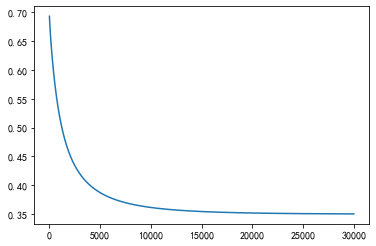

In [8]:
plt.figure()
plt.plot(range(len(loss)), loss)
plt.show()

### 准确率

In [9]:
y_predict = np.where(func(x, theta_final) > 0.5, 1, 0)
np.mean(y_predict == y)

0.8559322033898306

## 决策边界

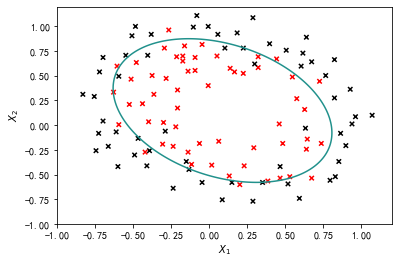

In [183]:
x1 = np.linspace(-1, 1.2, 200)
xx1, xx2 = np.meshgrid(x1, x1)
z = poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]) @ theta_final
zz = z.reshape((200, 200))
df.plot.scatter(0, 1, c=2, cmap=plt.cm.flag_r, colorbar=False, marker="x", xlabel="$X_1$", ylabel="$X_2$")
plt.contour(xx1, xx2, zz, 0)
plt.show()

# 逻辑回归(多分类)

## 读取数据

In [11]:
paths = glob.glob("../Coursera-ML-AndrewNg-master/*")
path = glob.glob(os.path.join(paths[2], "*.mat"))
data = sio.loadmat(path[0])
datax = np.insert(data["X"], 0, 1, axis=1)
datay = data["y"].ravel()
train_x, test_x, train_y, test_y = train_test_split(datax, datay, random_state=4)

## 预览数据

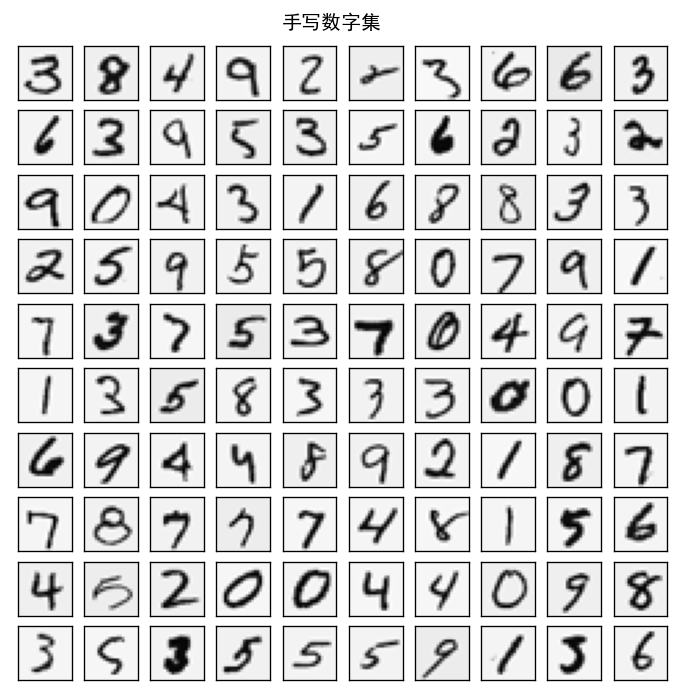

In [37]:
plt.close(3)
fig, ax = plt.subplots(10, 10, sharex=True, sharey=True, figsize=(7, 7), dpi=120, num=3)
fig.suptitle("手写数字集", y=0.91, va="center")
plt.xticks([])
plt.yticks([])
i = np.random.choice(train_x.shape[0], 100, replace=False)
temp = train_x[i, 1:]
for r in range(10):
    for c in range(10):
        ax[r, c].imshow(temp[r * 10 + c].reshape((20, 20)).T, cmap="gray_r")

## 梯度向量

In [13]:
def gradientVector(theta, x, y, lamda):
    return (x.T @ (func(x, theta) - y) + lamda * theta) / len(x)

## 训练过程

In [14]:
lamda = 1
theta_all = np.zeros((10, datax.shape[1]))
for i in range(1, 11):
    theta_i = np.zeros(datax.shape[1])
    result = minimize(
        fun=lossFunction,
        x0=theta_i,
        args=(train_x, train_y == i, lamda),
        method="TNC",
        jac=gradientVector,
    )
    theta_all[i - 1, :] = result.x

## 训练结果

In [185]:
probability = func(test_x, theta_all.T)
predict = np.argmax(probability, axis=1) + 1
print("accuracy:", np.mean(predict == test_y))

accuracy: 0.9136


## 数字识别

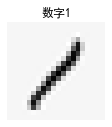

In [182]:
i = np.random.randint(len(test_x))
plt.close(4)
plt.figure(figsize=(1.8, 1.8))
plt.title(f"数字{predict[i] % 10}")
plt.imshow(test_x[i, 1:].reshape(20, 20).T, cmap="gray_r")
plt.axis("off")
plt.show()